In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

# We define all the hyperparameters
In this section, we define all the hyperparameters and necessary stuff for performing unlearning

In [24]:
path = "D://datasets//Restricted_BNN//iris//iris.xlsx";#path for dataset
data = pd.read_excel(path)
n_examples_to_be_deleted = 20
wrong_example_indexes = np.random.choice(len(data),n_examples_to_be_deleted)
n_unique_classes = np.unique(data['label'])
input_size = 4
hidden1 = 10
hidden2 = 5
output = 3
data.head()
print(n_unique_classes)

[0 1 2]


In [25]:
#from sklearn.model_selection import train_test_split
def one_hot(y,n_unique):
    ret_val = np.zeros((len(y),n_unique))
    for i in range(len(y)):
        ret_val[i][y[i]] = 1;
    return ret_val
y=data['label']
X = data.drop(['label'],axis=1).values
y = one_hot(y.values,len(n_unique_classes))
#X_train,y_train,X_test,y_test = 

# Training

1) Model creation

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden1,hidden2,output):
        super().__init__()
        self.hidden1 = nn.Linear(input_size,hidden1)
        self.act = nn.ReLU()
        self.hidden2 = nn.Linear(hidden1,hidden2)
        self.output = nn.Linear(hidden2,output)
        self.soft = nn.Softmax()
    def forward(self,x):
        x = self.act(self.hidden1(x))
        x = self.act(self.hidden2(x))
        x = self.output(x)
        return self.soft(x)
#model = NeuralNetwork(input_size,hidden1,hidden2,output)
#print(model)

2) Model training

In [34]:
loss_fn = nn.CrossEntropyLoss()
n_epochs = 300
batch_sz = 30
l_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=l_rate)
loss_list=[]
for epoch in tqdm(range(n_epochs)):
    loss_val = 0;
    for i in range(0,len(X),batch_sz):
        X_batch = torch.Tensor(X[i:i+batch_sz])
        y_pred = model(X_batch)
        #print(y_pred)
        y_batch = torch.Tensor(y[i:i+batch_sz])
        loss = loss_fn(y_pred,y_batch)
        #print(loss)
        #input()
        loss_val = loss_val + loss.item();
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(loss_val/batch_sz);

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 211.86it/s]


Text(0.5,1,'Epochs vs Loss')

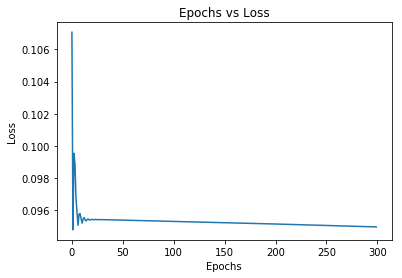

In [35]:
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')

In [41]:
with torch.no_grad():
    y_pred = model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))
#accuracy = (y_pred.round() == y).float().mean()
#print(f"Accuracy {accuracy}")

Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [42]:
save_path = "D://datasets//Machine_Unlearning//iris_model.pth"
torch.save(model,save_path)

In [43]:
new_model = torch.load(save_path)
print(new_model)

NeuralNetwork(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (act): ReLU()
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
  (soft): Softmax(dim=None)
)


In [44]:
with torch.no_grad():
    y_pred = new_model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))
#accuracy = (y_pred.round() == y).float().mean()
#print(f"Accuracy {accuracy}")

Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [5]:
print(wrong_example_indexes)

[ 46  24  91 108 142  30  53  21 140 140  53  73  76  68   5  87  38 112
  18 135]


In [6]:
X_new,y_new = [],[]
for i in range(len(wrong_example_indexes)):
    for j in n_unique_classes:
        X_new.append(X[wrong_example_indexes[i]])
        y_new.append(j)
X_new = np.array(X_new)
print(X_new)

[[5.1 3.8 1.6 0.2]
 [5.1 3.8 1.6 0.2]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.9 0.2]
 [4.8 3.4 1.9 0.2]
 [4.8 3.4 1.9 0.2]
 [6.1 3.  4.6 1.4]
 [6.1 3.  4.6 1.4]
 [6.1 3.  4.6 1.4]
 [6.7 2.5 5.8 1.8]
 [6.7 2.5 5.8 1.8]
 [6.7 2.5 5.8 1.8]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [4.8 3.1 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.5 2.3 4.  1.3]
 [5.5 2.3 4.  1.3]
 [5.5 2.3 4.  1.3]
 [5.1 3.7 1.5 0.4]
 [5.1 3.7 1.5 0.4]
 [5.1 3.7 1.5 0.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [5.5 2.3 4.  1.3]
 [5.5 2.3 4.  1.3]
 [5.5 2.3 4.  1.3]
 [6.1 2.8 4.7 1.2]
 [6.1 2.8 4.7 1.2]
 [6.1 2.8 4.7 1.2]
 [6.8 2.8 4.8 1.4]
 [6.8 2.8 4.8 1.4]
 [6.8 2.8 4.8 1.4]
 [6.2 2.2 4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.7 0.4]
 [6.3 2.3 4.4 1.3]
 [6.3 2.3 4.4 1.3]
 [6.3 2.3 4.4 1.3]
 [4.4 3.  1.3 0.2]
 [4.4 3.  1.3 0.2]
 [4.4 3.  1.3 0.2]
 [6.8 3.  5.5 2.1]
 [6.8 3.  5.

In [7]:
deleted_indexes = []
for i in range(len(wrong_example_indexes)):
    true_ = np.argmax(y[wrong_example_indexes[i]])
    deleted_indexes.append(int(i*len(n_unique_classes)+true_))
print(deleted_indexes)

[0, 3, 7, 11, 14, 15, 19, 21, 26, 29, 31, 34, 37, 40, 42, 46, 48, 53, 54, 59]


In [8]:
X_new = np.delete(X_new,deleted_indexes,axis=0)
print(X_new)
y_new = np.delete(y_new,deleted_indexes)

[[5.1 3.8 1.6 0.2]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.9 0.2]
 [4.8 3.4 1.9 0.2]
 [6.1 3.  4.6 1.4]
 [6.1 3.  4.6 1.4]
 [6.7 2.5 5.8 1.8]
 [6.7 2.5 5.8 1.8]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [4.8 3.1 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.5 2.3 4.  1.3]
 [5.5 2.3 4.  1.3]
 [5.1 3.7 1.5 0.4]
 [5.1 3.7 1.5 0.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [6.7 3.1 5.6 2.4]
 [5.5 2.3 4.  1.3]
 [5.5 2.3 4.  1.3]
 [6.1 2.8 4.7 1.2]
 [6.1 2.8 4.7 1.2]
 [6.8 2.8 4.8 1.4]
 [6.8 2.8 4.8 1.4]
 [6.2 2.2 4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.7 0.4]
 [6.3 2.3 4.4 1.3]
 [6.3 2.3 4.4 1.3]
 [4.4 3.  1.3 0.2]
 [4.4 3.  1.3 0.2]
 [6.8 3.  5.5 2.1]
 [6.8 3.  5.5 2.1]
 [5.7 3.8 1.7 0.3]
 [5.7 3.8 1.7 0.3]
 [7.7 3.  6.1 2.3]
 [7.7 3.  6.1 2.3]]


In [9]:
final_new_dataset = {'col1':X_new[:,0],'col2':X_new[:,1],'col3':X_new[:,2],'col4':X_new[:,3],'label':y_new}

In [10]:
new_data = pd.DataFrame(final_new_dataset)
new_data

,col1,col2,col3,col4,label
0,5.1,3.8,1.6,0.2,1
1,5.1,3.8,1.6,0.2,2
2,4.8,3.4,1.9,0.2,1
3,4.8,3.4,1.9,0.2,2
4,6.1,3.0,4.6,1.4,0
5,6.1,3.0,4.6,1.4,2
6,6.7,2.5,5.8,1.8,0
7,6.7,2.5,5.8,1.8,1
8,5.8,2.7,5.1,1.9,0
9,5.8,2.7,5.1,1.9,1


In [75]:
y_one_hot = one_hot(y_new,len(n_unique_classes))
for epoch in tqdm(range(n_epochs)):
    loss_val = 0;
    for i in range(0,len(X),1):
        X_batch = torch.Tensor(X_new[i:i+1])
        y_pred = new_model(X_batch)
        #print(y_pred)
        y_batch = torch.Tensor(y_one_hot[i:i+1])
        #print(y_batch)
        loss = loss_fn(y_pred,y_batch)
        #print(loss)
        #input()
        loss_val = loss_val + loss.item();
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:33<00:00,  3.21it/s]


# Comparison of Accuracy

1) With original model

In [76]:
with torch.no_grad():
    y_pred = model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))

Accuracy= 0.9733333333333334


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [77]:
with torch.no_grad():
    y_pred = new_model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))

Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [85]:
print(model(torch.Tensor(X_new[8])))

tensor([1.0000e+00, 9.4159e-09, 2.2897e-42], grad_fn=<SoftmaxBackward0>)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# Direct function

In [11]:
#Train on the combined data
data = data.append(new_data)
print(len(data))

y=data['label']
X = data.drop(['label'],axis=1).values
y = one_hot(y.values,len(n_unique_classes))

190


In [18]:
fmodel = NeuralNetwork(input_size,hidden1,hidden2,output)
print(fmodel)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100
batch_sz = 10
l_rate = 0.01
optimizer = optim.Adam(fmodel.parameters(), lr=l_rate)
loss_list=[]
for epoch in tqdm(range(n_epochs)):
    loss_val = 0;
    for i in range(0,len(X),batch_sz):
        X_batch = torch.Tensor(X[i:i+batch_sz])
        y_pred = fmodel(X_batch)
        #print(y_pred)
        y_batch = torch.Tensor(y[i:i+batch_sz])
        loss = loss_fn(y_pred,y_batch)
        #print(loss)
        #input()
        loss_val = loss_val + loss.item();
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(loss_val/batch_sz);

NeuralNetwork(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (act): ReLU()
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
  (soft): Softmax(dim=None)
)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.47it/s]


Text(0.5,1,'Epochs vs Loss')

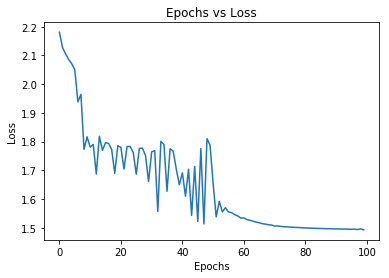

In [19]:
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')

In [27]:
with torch.no_grad():
    y_pred = fmodel(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))

Accuracy= 0.9666666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [26]:
save_path = "D://datasets//Machine_Unlearning//iris_model.pth" 
new_model = torch.load(save_path)
print(new_model)
with torch.no_grad():
    y_pred = new_model(torch.Tensor(X))
correct = 0
for i in range(len(y_pred)):
    val = torch.argmax(y_pred[i])
    actual = np.argmax(y[i])
    if(val==actual):
        correct+=1;
print("Accuracy=",correct/len(y))

NeuralNetwork(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (act): ReLU()
  (hidden2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
  (soft): Softmax(dim=None)
)
Accuracy= 0.9866666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
